<a href="https://colab.research.google.com/github/brettkvo/ML-assignments/blob/master/Visco_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
# Set up the environment
import numpy as np
import csv
import matplotlib.pyplot as plt
import io
import pandas as pd
from scipy.optimize import curve_fit
from scipy import stats


In [54]:
#Import .csv data
#with open("Testing_data.csv", "r") as i:
#rawdata = list(csv.reader(i,delimiter = ","))

# To import data from the web, here's an example:
# !wget -O data.csv https://www.dropbox.com/s/nka31hp11x9jsqt/data.csv?dl=0

#To upload files from computer
#from google.colab import files
#uploaded = files.upload()

#To use a file uploaded to GitHub (BKVO: This is what i used)
url = 'https://raw.githubusercontent.com/brettkvo/viscoelasticity/main/data.csv'
df = pd.read_csv(url) # reads csv into DataFrame



In [55]:
# Check that the data is good
df.head(10)

,time,force
0,0.0000,17.967839
1,0.0001,17.954566
2,0.0002,17.941293
3,0.0003,17.928020
4,0.0004,17.923595
5,0.0005,17.914747
6,0.0006,17.905898
7,0.0007,17.905898
8,0.0008,17.897049
9,0.0009,17.897049


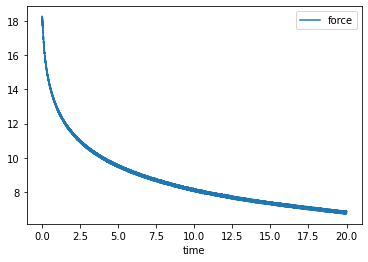

In [56]:
# Plot the data simply
df.plot(x='time', y='force')

In [57]:
# Convert Force into linear fit
time = df.iloc[:, 0]
force = df.iloc[:, 1]
force_linear = (force[0] * time)/(force[0] - force) # BK: See Peleg model

# Append this to the data matrix
df['force_linear'] = force_linear

In [79]:
# When force(t)==force(0), we get infinite numbers (infs), so here we remove them (and save a new df).
df2 = df[np.isfinite(df).all(1)]

# When force(t) is very close to force(0), we get wild linear forces. Since this force only occurs
# at the start of the tests, we omit the first 1000 data points (at 10khz, this is .1 sec).  Makes me wonder if we can change the model 
# by adding a constant to resolve this?
df3 = df2.iloc[1000:]

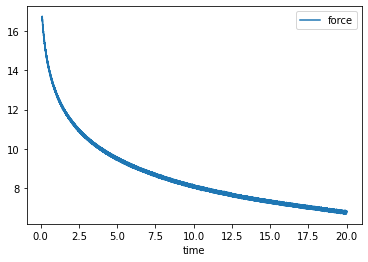

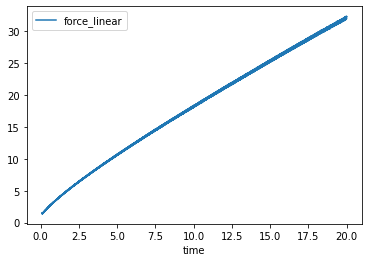

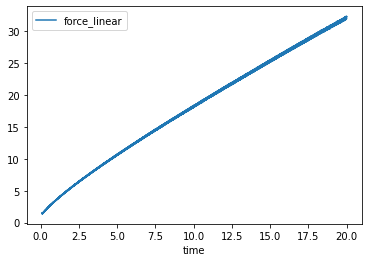

In [81]:
#Plot the new DataFrame
df3.plot(x="time", y="force")

#Plot the new DataFrame
df3.plot(x="time", y="force_linear")

#Plot the new DataFrame, but without the first 1000 datapoints.
df3.plot(x="time", y="force_linear")

In [113]:
# Curve fitting - We really just want to do a linear regression 
# on this to get our two coefficients (k1 (b, intercept) and k2 (m, slope)). 

model = np.polyfit(df3.time, df3.force_linear, 1)
# Here are the model coefficients!  The first number is the slope and the second is the intercept!
model 


array([1.49739367, 2.85719671])

In [114]:
#Verifying that the code is working by using a different package to do the same thing
#Plus! This one gives R-sq and stdev!
model2 = stats.linregress(df3.time, df3.force_linear)
model2 



LinregressResult(slope=1.4973936669424999, intercept=2.857196706263899, rvalue=0.9987887428468667, pvalue=0.0, stderr=0.00016536473368348176, intercept_stderr=0.0019142758165434813)

## Jonatan's code below.....

In [ ]:

# Selecting part of the data that needs to be used. Somehow
# it is not cutting off the beginning.
xdata = x_raw_data[5000:]
ydata = y_raw_data[5000:]
y_linear = (ydata[0] * xdata)/(ydata[0] - ydata)



KeyError: ignored

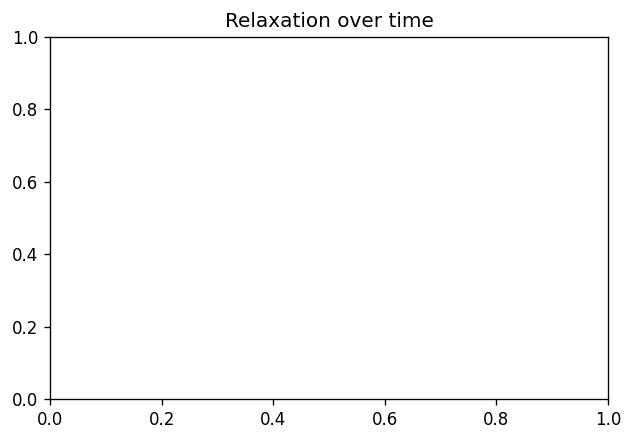

In [ ]:


#Plot the data
plt.figure(1,dpi=120)
plt.title("Relaxation over time")
plt.xlabel(df[0][0])
plt.ylabel(df[0][1])
plt.xscale("linear")
plt.yscale("linear")
plt.ylim(-10,30)
plt.plot(xdata, ydata, "g", label = "Original function")

# Plotting the linear graph
plt.plot(xdata,y_linear, "b", label = "Linear function")
plt.legend(loc="lower right")


# Define linear function
def func(a,x,b):
    return a*x + b

# Define constants
slope, intercept = np.polyfit(xdata, y_linear,1)
a = slope
b = intercept

#Using function to plot new function (not working)
funcdata = func(a, xdata, b)
#plt.plot(xdata, funcdata, "r", label = "linear fit")


    